## Case FortBrasil
**Questão 1** <br>
**Descrição**: <br>

O negócio da Fortbrasil consiste na oferta de crédito rápido e consciente para parceiros e clientes de classes emergentes, sendo nosso principal produto o cartão de crédito. Para a primeira questão, disponibilizamos algumas variáveis relacionadas à fatura dos clientes: <br>

**ID_CONTA**: Identificador da conta; <br>
**DT_VENCIMENTO**: Data vencimento da fatura; <br>
**DS_ROLAGEM**: Indicador que define se o cliente pagou a fatura do Mês anterior ou não. Se o valor for FX0 quer dizer que o cliente pagou a fatura do mês anterior e se FX1 quer dizer que o cliente não pagou a fatura do mês anterior; <br>
**VL_FATURA**: Valor da Fatura atual. <br>


### Preparação do Ambiente de Análise
**Objetivos**: <br>
1- Importar bibliotecas <br>
2- Carregar Dados <br>
**Setting**: <br>
**Data Source**: `Questão 1 - Base.txt`

In [46]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# path to data
data_path = "/content/drive/MyDrive/FortBrasil_Case/Questão 1 - Base.txt"

In [3]:
# reading CSV files
data = pd.read_csv(data_path, sep='\t')

In [4]:
# checking dtypes
data.dtypes

ID_CONTA           int64
DT_VENCIMENTO     object
DS_ROLAGEM        object
VL_FATURA        float64
dtype: object

**Necessário casting de tipos** <br>
**DT_VENCIMENTO** para pd.datetime[64] <br>
**DT_ROLAGEM** para categórico ou numérico <br>

In [5]:
# check if nulls in DS_ROLAGEM
data.isna().any() # sem nulls

ID_CONTA         False
DT_VENCIMENTO    False
DS_ROLAGEM       False
VL_FATURA        False
dtype: bool

In [6]:
# cast DS_ROLAGEM pra int
data.loc[:, 'DS_ROLAGEM'] = data.loc[:, 'DS_ROLAGEM'].apply(lambda x: int(x[-1]))

In [7]:
data.loc[:, 'DT_VENCIMENTO'] = pd.to_datetime(data.loc[:, 'DT_VENCIMENTO'])

### Análise Exploratória I
**Objetivos**: <br>
1- Investigar as distribuições das features <br>
2- Descrever features numérica e graficamente

In [8]:
data

,ID_CONTA,DT_VENCIMENTO,DS_ROLAGEM,VL_FATURA
0,402467,2019-01-01,0,210.00
1,403001,2019-01-01,1,1097.18
2,403499,2019-01-01,0,1209.88
3,403670,2019-01-01,0,667.40
4,404183,2019-01-01,1,1239.52
...,...,...,...,...
2728244,1624841,2019-08-08,1,1467.05
2728245,1624848,2019-08-08,0,1189.15
2728246,1624871,2019-08-08,1,427.72
2728247,1624878,2019-08-08,0,281.14


In [9]:
print(f"** Contas únicas: {len(data.ID_CONTA.unique())}")
print(f"** Distribuição das Rolagens:\n {dict(data.DS_ROLAGEM.value_counts())}")


** Contas únicas: 458842
** Distribuição das Rolagens:
 {0: 2481796, 1: 246453}


#### Questão 1.1
1.1 – Qual o percentual de faturas emitidas por mês no qual os clientes não pagaram a fatura anterior? 

In [10]:
counts_dsrol = data.DS_ROLAGEM.value_counts(normalize=True)*100

In [11]:
# total
counts_dsrol

0    90.966624
1     9.033376
Name: DS_ROLAGEM, dtype: float64

In [12]:
percentuais = (data
 .groupby(pd.Grouper(key="DT_VENCIMENTO", freq="M"))["DS_ROLAGEM"]
 .value_counts(normalize=True)
)*100
percentuais = percentuais.reset_index(name='Percentuais')

**Resposta 1.1** <br>
Os percentuais de inadimplência estão listados na Tabela 1 (abaixo). <br>
*ToDo*: adicionar um plot disso...

In [13]:
percentuais

,DT_VENCIMENTO,DS_ROLAGEM,Percentuais
0,2019-01-31,0,92.713389
1,2019-01-31,1,7.286611
2,2019-02-28,0,91.101453
3,2019-02-28,1,8.898547
4,2019-03-31,0,89.121366
5,2019-03-31,1,10.878634
6,2019-04-30,0,91.605200
7,2019-04-30,1,8.394800
8,2019-05-31,0,89.955444
9,2019-05-31,1,10.044556


In [14]:
to_plot = percentuais[percentuais.DS_ROLAGEM == 1].iloc[:,[0,2]].reset_index(drop=True)

In [15]:
to_plot

,DT_VENCIMENTO,Percentuais
0,2019-01-31,7.286611
1,2019-02-28,8.898547
2,2019-03-31,10.878634
3,2019-04-30,8.394800
4,2019-05-31,10.044556
5,2019-06-30,8.534790
6,2019-07-31,9.613888
7,2019-08-31,9.063069
8,2019-09-30,8.536922


In [16]:
to_plot

,DT_VENCIMENTO,Percentuais
0,2019-01-31,7.286611
1,2019-02-28,8.898547
2,2019-03-31,10.878634
3,2019-04-30,8.394800
4,2019-05-31,10.044556
5,2019-06-30,8.534790
6,2019-07-31,9.613888
7,2019-08-31,9.063069
8,2019-09-30,8.536922


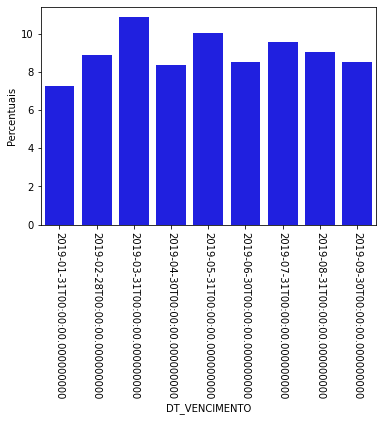

In [47]:
sns.barplot(data=to_plot, x='DT_VENCIMENTO', y='Percentuais', color='blue')
plt.xticks(rotation=-90)
plt.show()

#### Questão 1.2
1.2 – Tendo como referência todos os clientes que tiveram fatura emitida no mês de setembro, gere uma base para esses clientes com os seguintes calculados: <br>
• Total de faturas emitidas nos últimos 6 meses (sem contar com a fatura de setembro); <br>
• O valor médio de fatura nos últimos 6 meses (sem contar com a fatura de setembro); <br>
• Quantidade de vezes que ele ficou sem pagar a fatura anterior nos últimos 6 meses (sem contar com a fatura de setembro). 


In [18]:
# pegando clientes de setembro
# pegando uma dummy var, para não encher a stack da memória
# vai que...
mask_users = data['DT_VENCIMENTO'].dt.month==9 
users_setembro = data[mask_users].ID_CONTA.unique()
# esticando com +1, pra que month i e j sejam parâmetros posteriormente

# month range
# 9-dt-1, é o primeiro mês, fev
# 9-1 é o último mês (na maioria dos métodos, não preciso setar isso)
month_i, month_j = (9-6)-1, 9-1
print(month_i, month_j)

# máscara para selecionar os usuários
mask = (data['ID_CONTA'].isin(users_setembro) & data['DT_VENCIMENTO'].dt.month.isin(np.arange(month_i, month_j+1)))

2 8


In [19]:
# copiando para não mexer na referência
# dataframe contendo as informações para montar a base.
data3 = data[mask].copy().reset_index(drop=True)
data3

,ID_CONTA,DT_VENCIMENTO,DS_ROLAGEM,VL_FATURA
0,1615898,2019-02-01,0,63.03
1,1615901,2019-02-01,0,82.28
2,1615947,2019-02-01,0,30.75
3,1615960,2019-02-01,0,93.82
4,1615981,2019-02-01,0,73.28
...,...,...,...,...
1368027,1624839,2019-08-08,0,333.15
1368028,1624841,2019-08-08,1,1467.05
1368029,1624848,2019-08-08,0,1189.15
1368030,1624878,2019-08-08,0,281.14


In [20]:
from collections import Counter

In [21]:
d4 = data3.groupby(['ID_CONTA']).agg({'DT_VENCIMENTO': 'count',
                               'VL_FATURA': 'mean',
                               'DS_ROLAGEM': 'sum'})

In [22]:
data_new = data[mask_users].merge(d4, on='ID_CONTA', how='right', indicator=True)

In [23]:
data_new[data_new._merge != 'both']


,ID_CONTA,DT_VENCIMENTO_x,DS_ROLAGEM_x,VL_FATURA_x,DT_VENCIMENTO_y,VL_FATURA_y,DS_ROLAGEM_y,_merge


Checking wether the left joined users/registries are from users who were only accounted for september.

In [24]:
data_new[data_new._merge != 'both'].groupby('ID_CONTA').agg({'DT_VENCIMENTO_x': 'count'})

,DT_VENCIMENTO_x
ID_CONTA,


In [25]:
data_new[data_new.ID_CONTA == 1734275]

,ID_CONTA,DT_VENCIMENTO_x,DS_ROLAGEM_x,VL_FATURA_x,DT_VENCIMENTO_y,VL_FATURA_y,DS_ROLAGEM_y,_merge


**Conclusões Preliminares**
Usuários que só faturaram em setembro estão fora da contagem e da base oficial. No enunciado da questão, é explicitado que não deve-se contar os registros de setembro, somente os usuarios. <br>
**Passos necessários agora**

1- Dropar as colunas que vieram de right ou left. <br>
2- Modificar os nomes de colunas pra adequar ao que a questão pede. <br>

In [26]:
data_new.rename(columns={'DT_VENCIMENTO_x': 'DT_VENCIMENTO',
                 'DT_VENCIMENTO_y': 'QTD_FATURA_ULT_6M',
                 'DS_ROLAGEM_x': 'DS_ROLAGEM',
                 'DS_ROLAGEM_y': 'QTD_FATURA_ULT_6M_FX1',
                 'VL_FATURA_x': 'VL_FATURA',
                 'VL_FATURA_y': 'VL_MEDIO_FATURA'},
                inplace=True)
data_new.drop('_merge',axis='columns', inplace=True)

**Resposta Qt 1.2**

A base de dados resultante dos protocolos requeridos é:

In [27]:
data_new

,ID_CONTA,DT_VENCIMENTO,DS_ROLAGEM,VL_FATURA,QTD_FATURA_ULT_6M,VL_MEDIO_FATURA,QTD_FATURA_ULT_6M_FX1
0,27717,2019-09-20,0,878.89,7,1638.812857,0
1,27789,2019-09-10,0,848.69,7,945.460000,0
2,30256,2019-09-08,0,180.95,7,443.702857,0
3,35473,2019-09-10,0,808.52,7,898.972857,0
4,35510,2019-09-05,0,1608.72,7,1308.940000,0
...,...,...,...,...,...,...,...
240546,1733074,2019-09-23,1,178.32,1,110.690000,0
240547,1733098,2019-09-23,0,204.38,1,204.370000,0
240548,1733273,2019-09-23,0,492.49,1,121.820000,0
240549,1733278,2019-09-23,0,138.58,1,107.690000,0


In [48]:
data_new.to_csv('/content/drive/MyDrive/FortBrasil_Case/base_QT1.csv')

#### Qt 1.3
<br>
Utilizando como referência a base calculada na questão anterior, identifique qual das 3 variáveis calculadas tem o maior potencial de preditivo em relação a variável DS_ROLAGEM do mês de setembro.  <br>


Examinando correlação de Pearson.

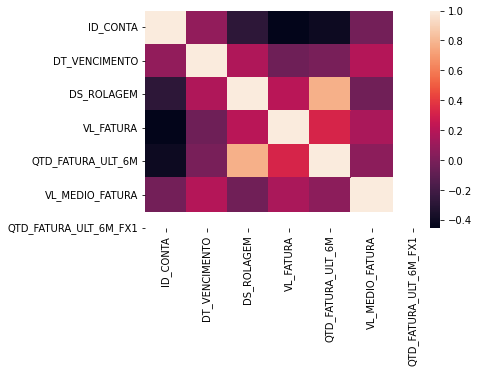

In [28]:
import seaborn as sns
%matplotlib inline

# plot the heatmap
sns.heatmap(data_new.corr(), 
        xticklabels=data_new.columns,
        yticklabels=data_new.columns)

In [29]:
# Percentual de clientes com cada uma das condições.
data_new.DS_ROLAGEM.value_counts(normalize=True)*100

0    90.885093
1     9.114907
Name: DS_ROLAGEM, dtype: float64

**Conclusões preliminares** <br>
Partindo da matriz de correlação entre todas as features/colunas, vemos que há correlações lineares **muito fracas** entre as 3 colunas e o DS_ROLAGEM. Talvez isso esteja ocorrendo pois a quantidade de amostras com FX1 é bem menos do que FX0. <br>
Ou seja, são menos de 10% do dataset com DS_ROLAGEM == FX1. Portanto, é interessante tentar alguma abordagem de geração. <br>

#### Testes Estatísticos para Determinar Feature Importance
A primeira parte dos testes é tentar entender se há qualquer correlação linear entre as features e o dado que queremos predizer (DS_ROLAGEM). Posteriomente, utilizaremos permutation_importance para averiguar a importância das features em relação aos modelos selecionados.

In [30]:
data_pred = data_new.iloc[:,[2,4,5,6]]

In [ ]:
g = sns.PairGrid(data_pred, diag_sharey=False).add_legend()
g.map_lower(sns.kdeplot,cmap='Spectral')
g.map_upper(sns.regplot, color="red")
g.map_diag(sns.kdeplot, lw=1,fill=True)

##### Testando hipóteses sobre os dados
1- Testar normalidade (e talvez homocedasticidade) dessas features. <br>
2- E depois rodar algum teste para checar a correlação entre as variáveis. <br>
2.1- Man-Whitney e Kruskal pra 'QTD_FATURA_ULT_6M', 'QTD_FATURA_ULT_6M_FX1' <br>
2.2- 'VL_MEDIO_FATURA' é contínuo então PointBiserial.

In [31]:
# Testando Pointbiserial...
from scipy.stats.stats import pointbiserialr as pb

In [32]:
data_new

,ID_CONTA,DT_VENCIMENTO,DS_ROLAGEM,VL_FATURA,QTD_FATURA_ULT_6M,VL_MEDIO_FATURA,QTD_FATURA_ULT_6M_FX1
0,27717,2019-09-20,0,878.89,7,1638.812857,0
1,27789,2019-09-10,0,848.69,7,945.460000,0
2,30256,2019-09-08,0,180.95,7,443.702857,0
3,35473,2019-09-10,0,808.52,7,898.972857,0
4,35510,2019-09-05,0,1608.72,7,1308.940000,0
...,...,...,...,...,...,...,...
240546,1733074,2019-09-23,1,178.32,1,110.690000,0
240547,1733098,2019-09-23,0,204.38,1,204.370000,0
240548,1733273,2019-09-23,0,492.49,1,121.820000,0
240549,1733278,2019-09-23,0,138.58,1,107.690000,0


In [33]:
targets = {'DS_ROLAGEM'}
cont_features = {'VL_MEDIO_FATURA'}
quasi_cat_features = {'QTD_FATURA_ULT_6M', 'QTD_FATURA_ULT_6M_FX1'}

In [34]:
for feat in cont_features:
  corr1 = pb(data_pred['DS_ROLAGEM'], data_pred[feat])
  corr2 = pb(data_pred['DS_ROLAGEM'], data_new['VL_FATURA'])
  print("PBsl para {0} corresponde a {1}.".format(feat,corr1))
  print("PBsl para {0} corresponde a {1}.".format('VL_FATURA',corr2))

PBsl para VL_MEDIO_FATURA corresponde a PointbiserialrResult(correlation=-0.010390070671227748, pvalue=3.4685934961594827e-07).
PBsl para VL_FATURA corresponde a PointbiserialrResult(correlation=0.17117137907276114, pvalue=0.0).


Aparentemente, não há correlações lineares fortes. Mesmo usando PointBiserial (que testa correlação para cont x disc).

In [35]:
from scipy import stats

In [36]:
# Shapiro-Wilk pra testar normalidade
stats.shapiro(data_new['DS_ROLAGEM'])
# descartando p-value, mas aparentemente não segue normalidade

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.32437610626220703, 0.0)

In [37]:
stats.shapiro(data_new['QTD_FATURA_ULT_6M'])
# bom, parece que essa feature é ligeiramente normal.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.6821202039718628, 0.0)

In [38]:
stats.shapiro(data_new['QTD_FATURA_ULT_6M_FX1'])
# aparentemente não segue tanto assim uma normalidade

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.5171551704406738, 0.0)

Utilizarei Mann-Whitney U e Kruskal...

In [39]:
stats.kruskal(data_pred['DS_ROLAGEM'], data_pred['QTD_FATURA_ULT_6M'])

KruskalResult(statistic=406434.21053280524, pvalue=0.0)

In [40]:
lista = pd.crosstab(index=data_new['DS_ROLAGEM'],columns=data_new['QTD_FATURA_ULT_6M']).to_numpy()
stats.kruskal(*lista)

KruskalResult(statistic=5.834558823529413, pvalue=0.0157143497722189)

Kruskal Wallis pra crosstab para quantidade de faturas tem uma correlação interessante. Uma vez que o p-value está abaixo de 5%, temos um resultado com força estatística.

In [41]:
lista = pd.crosstab(index=data_new['DS_ROLAGEM'],columns=data_new['QTD_FATURA_ULT_6M_FX1']).to_numpy()
stats.kruskal(*lista)

KruskalResult(statistic=0.3306122448979636, pvalue=0.5652987983097866)

Bom, no caso das faturas em atraso, não parece haver uma correlação que se sustente, uma vez que o p-value está em 50%+. Isso indica que o teste encontrou um resultado aleatório. Ou seja, se tentarmos esse teste outras vezes, os resultados serão completamente diferentes uns dos outros. O que indica que a hipótese nula foi confirmada...

##### Testando Feature Importance com o XGBoost

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
X = MinMaxScaler().fit_transform(data_pred.iloc[:,1:].to_numpy())
y = data_pred.iloc[:,0].to_numpy()

Feature: 0, Score: 0.00017
Feature: 1, Score: 0.00021
Feature: 2, Score: 0.00003


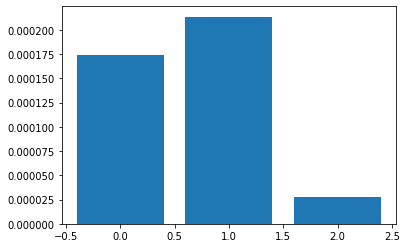

In [44]:
# permutation feature importance with knn for regression
# modified from: https://machinelearningmastery.com/calculate-feature-importance-with-python/

from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

# define the model
model = XGBClassifier()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [45]:
quasi_cat_features

{'QTD_FATURA_ULT_6M', 'QTD_FATURA_ULT_6M_FX1'}

**Conclusões** 

Pôde-se confirmar que as maiores correlações lineares são entre o valor médio da fatura e (dado outros testes), entre a quantidade de faturas pagas anteriormente. Da comparação dos testes Kruskal-Wallis das variáveis categóricas (QTD_FATURA_ULT_6M_FX1, QTD_FATURA_ULT_6M), vemos que QTD_FATURA_ULT_6M tem um potencial maior. Bem como VL_MEDIO_FATURA, de acordo com o teste U de Mann-Whitney. <br>

As correlações abordadas até o momento são lineares, o que explica baixos índices/métricas (coeficientes próximos de 0) na correlação Pearson (Heatmap). No entanto, ao aplicar um modelo não linear (Gradient Boost Classifier) ao teste, percebemos que os padrões lineares não se mantém totalmente. Sendo assim, o ranking de preditores, de acordo com o padrão não linear é: <br>
1. QTD_FATURA_ULT_6M_FX1, <br>
2. QTD_FATURA_ULT_6M, <br>
3. VL_FATURA_MEDIO <br>

São necessários mais testes para averiguar estes resultados. Uma vez que o teste de correlações não lineares (e causalidade) são complexos, uma resposta mais robusta demanda mais estudos. Da interpretação dos resultados, há sentido em afirmar que **clientes que atrasam o pagamento tem uma alta probabilidade de recorrência**. <br>

Porém, um problema chama a atenção neste caso, que é o **desbalanço entre as distribuições de usuários que atrasam e os que não atrasam**. Um conjunto de dados desbalanceado pode promover uma série de viéses no estudo. Incluíndo impactar negativamente nos testes de correlação. Testes não paramétricos, ou baseados em amostragem, teoricamente eliminam (alguns d)esses viéses. Esse comportamento é latente ao analisar a diferença entre os testes lineares e os não lineares. 

A solução mais eficaz para esses problemas é aumentar o volume de dados de usuários que atrasam pagamento. Para isso, uma opção, sem utilizar geração de dados, é realizar estes mesmos cálculos para outros intervalos de tempo e estratificar os dados, criando um novo conjunto de clientes que atrasam. Modificar o conjunto negativo (dos usuários que pagam corretamente), para se adequar aos estratos e distribuições de outros meses, também é uma opção viável e interessante. Porém, a implementação de cada um dependedos requisitos de projeto, principalmente os operacionais.